In [1]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

pd.set_option('display.width', 1000)

In [2]:
target_symbol = 'AAPL'
symbol_list = ['MSFT', 'GOOGL', 'META', 'NVDA', 'TSLA', 'V', 'JPM', 'MA', 'JNJ', '^GSPC', '^IXIC']

In [3]:
ticker = yf.Ticker(target_symbol)
df_target = ticker.history(period='10y')
df_target.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
df_target['Rate'] = df_target['Close'].pct_change()*100
df_target['Rate'][0] = (df_target['Close'][0] - df_target['Open'][0]) / df_target['Open'][0] * 100

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
def get_symbol_list_data(df_target, symbol_list):
    # start_time = (datetime.date.today() - datetime.timedelta(days=727)).strftime('%Y-%m-%d')
    for symbol in symbol_list:
        ticker = yf.Ticker(symbol)
        symbol_history = ticker.history(period='10y')
        symbol_history.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
        symbol_history[f'Rate_{symbol}'] = symbol_history['Close'].pct_change()*100
        symbol_history[f'Rate_{symbol}'][0] = (symbol_history['Close'][0] - symbol_history['Open'][0]) / symbol_history['Open'][0] * 100
        df_target = pd.concat([df_target, symbol_history[f'Rate_{symbol}']], axis=1)
    return df_target

In [5]:
df_symbol_history = get_symbol_list_data(df_target, symbol_list)

df_symbol_history.reset_index(inplace=True)
df_symbol_history['Date'] = df_symbol_history['Date'].dt.strftime('%Y-%m-%d')
df_symbol_history.set_index(df_symbol_history['Date'], inplace=True)
df_symbol_history.drop(['Date'], axis=1, inplace=True)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\ozing\miniconda3\envs\RL_trader\lib\s

In [6]:
df_symbol_history

,Open,High,Low,Close,Volume,Rate,Rate_MSFT,Rate_GOOGL,Rate_META,Rate_NVDA,Rate_TSLA,Rate_V,Rate_JPM,Rate_MA,Rate_JNJ,Rate_^GSPC,Rate_^IXIC
Date,,,,,,,,,,,,,,,,,
2013-02-19,14.222979,14.273257,13.999347,14.188739,435783600,-0.240737,0.609756,1.364332,2.479634,-1.412868,5.139177,-0.253145,0.671828,-0.407620,1.223202,0.733648,0.504467
2013-02-20,14.117794,14.117794,13.843574,13.845118,476302400,-2.421789,-0.641714,-1.783475,-1.624615,-1.433141,-1.883928,-1.389501,-1.698692,-1.902984,-0.402825,-1.240414,-1.530381
2013-02-21,13.757208,13.854990,13.659119,13.759059,447182400,-0.621581,-1.363487,0.387398,-4.146165,-0.726965,-8.770096,1.299686,-0.740606,1.302370,0.287053,-0.630306,-1.040318
2013-02-22,13.857457,13.929943,13.775715,13.905576,330654800,1.064875,0.982184,0.525436,-0.549859,1.871444,2.701911,1.264006,1.367884,0.816017,-0.013137,0.877247,0.968551
2013-02-25,13.999345,14.038519,13.651405,13.658500,372579200,-1.776813,-1.404912,-1.117899,0.516039,-1.757204,-4.790897,-2.220416,-2.473913,-2.468365,-0.891773,-1.830958,-1.441261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,150.949997,154.259995,150.919998,153.850006,62199000,1.880678,3.124287,0.042298,3.031868,2.459446,-1.142770,0.739440,1.084809,1.090423,0.370039,1.144861,1.482063
2023-02-14,152.119995,153.770004,150.860001,153.199997,61707600,-0.422495,0.313292,0.073988,0.027868,5.429595,7.506166,0.222822,0.441881,-0.234608,-0.436259,-0.028041,0.574853
2023-02-15,153.110001,155.500000,152.880005,155.330002,65669300,1.390343,-0.799298,2.386990,-1.292619,-0.901139,2.384710,-0.204892,0.418999,-0.086490,-1.647745,0.277318,0.923395


[]

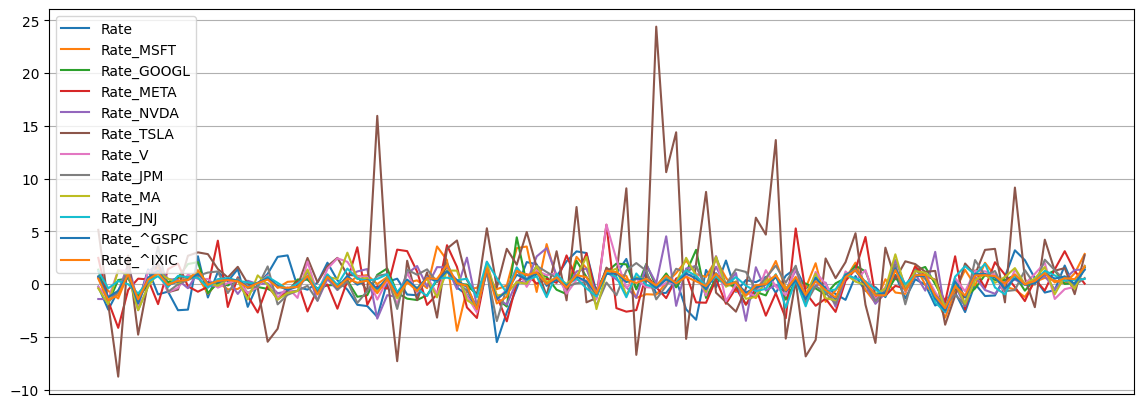

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df_symbol_history.iloc[:, 5:][:100], label=df_symbol_history.columns[5:])
plt.grid()
plt.legend()
plt.gca().axes.xaxis.set_visible(False)
plt.plot()

In [8]:
from keras import backend as K
from keras.layers import Concatenate
from keras.layers import Input, Dense, Lambda, Subtract, Add, Reshape
from keras.models import Model


def smape_loss(y_true, y_pred):
    """
    sMAPE loss as defined in "Appendix A" of
    http://www.forecastingprinciples.com/files/pdf/Makridakia-The%20M3%20Competition.pdf
    :return: Loss value
    """
    # mask=tf.where(y_true,1.,0.)
    mask = tf.cast(y_true, tf.bool)
    mask = tf.cast(mask, tf.float32)
    sym_sum = tf.abs(y_true) + tf.abs(y_pred)
    condition = tf.cast(sym_sum, tf.bool)
    weights = tf.where(condition, 1. / (sym_sum + 1e-8), 0.0)
    return tf.convert_to_tensor(200 * np.nanmean(tf.abs(y_pred - y_true) * weights * mask))
    # return np.mean((np.abs(y_true-y_pred))/(np.abs(y_true) + np.abs(y_pred)))


class NBeatsNet:
    GENERIC_BLOCK = 'generic'
    TREND_BLOCK = 'trend'
    SEASONALITY_BLOCK = 'seasonality'

    _BACKCAST = 'backcast'
    _FORECAST = 'forecast'

    def __init__(self,
                 input_dim=1,
                 output_dim=1,
                 exo_dim=0,
                 backcast_length=10,
                 forecast_length=1,
                 stack_types=(TREND_BLOCK, SEASONALITY_BLOCK),
                 nb_blocks_per_stack=3,
                 thetas_dim=(4, 8),
                 share_weights_in_stack=False,
                 hidden_layer_units=256,
                 nb_harmonics=None):

        self.stack_types = stack_types
        self.nb_blocks_per_stack = nb_blocks_per_stack
        self.thetas_dim = thetas_dim
        self.units = hidden_layer_units
        self.share_weights_in_stack = share_weights_in_stack
        self.backcast_length = backcast_length
        self.forecast_length = forecast_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.exo_dim = exo_dim
        self.input_shape = (self.backcast_length, self.input_dim)
        self.exo_shape = (self.backcast_length, self.exo_dim)
        self.output_shape = (self.forecast_length, self.output_dim)
        self.weights = {}
        self.nb_harmonics = nb_harmonics
        self._gen_intermediate_outputs = False
        self._intermediary_outputs = []
        assert len(self.stack_types) == len(self.thetas_dim)

        x = Input(shape=self.input_shape, name='input_variable')
        x_ = {}
        for k in range(self.input_dim):
            x_[k] = Lambda(lambda z: z[..., k])(x)
        e_ = {}
        if self.has_exog():
            e = Input(shape=self.exo_shape, name='exos_variables')
            for k in range(self.exo_dim):
                e_[k] = Lambda(lambda z: z[..., k])(e)
        else:
            e = None
        y_ = {}

        for stack_id in range(len(self.stack_types)):
            stack_type = self.stack_types[stack_id]
            nb_poly = self.thetas_dim[stack_id]
            for block_id in range(self.nb_blocks_per_stack):
                backcast, forecast = self.create_block(x_, e_, stack_id, block_id, stack_type, nb_poly)
                for k in range(self.input_dim):
                    x_[k] = Subtract()([x_[k], backcast[k]])
                    layer_name = f'stack_{stack_id}-{stack_type.title()}Block_{block_id}'
                    if self.input_dim >= 1:
                        layer_name += f'_Dim_{k}'
                    # rename.
                    forecast[k] = Lambda(function=lambda _x: _x, name=layer_name)(forecast[k])
                    if stack_id == 0 and block_id == 0:
                        y_[k] = forecast[k]
                    else:
                        y_[k] = Add()([y_[k], forecast[k]])

        for k in range(self.input_dim):
            y_[k] = Reshape(target_shape=(self.forecast_length, 1))(y_[k])
            x_[k] = Reshape(target_shape=(self.backcast_length, 1))(x_[k])
        if self.input_dim > 1:
            y_ = Concatenate()([y_[ll] for ll in range(self.input_dim)])
            x_ = Concatenate()([x_[ll] for ll in range(self.input_dim)])
        else:
            y_ = y_[0]
            x_ = x_[0]

        if self.input_dim != self.output_dim:
            y_ = Dense(self.output_dim, activation='linear', name='reg_y')(y_)
            x_ = Dense(self.output_dim, activation='linear', name='reg_x')(x_)

        inputs_x = [x, e] if self.has_exog() else x
        n_beats_forecast = Model(inputs_x, y_, name=self._FORECAST)
        n_beats_backcast = Model(inputs_x, x_, name=self._BACKCAST)

        self.models = {model.name: model for model in [n_beats_backcast, n_beats_forecast]}
        self.cast_type = self._FORECAST

    def get_generic_and_interpretable_outputs(self):
        g_pred = sum([a['value'][0] for a in self._intermediary_outputs if 'generic' in a['layer'].lower()])
        i_pred = sum([a['value'][0] for a in self._intermediary_outputs if 'generic' not in a['layer'].lower()])
        outputs = {o['layer']: o['value'][0] for o in self._intermediary_outputs}
        return g_pred, i_pred, outputs

    def has_exog(self):
        # exo/exog is short for 'exogenous variable', i.e. any input
        # features other than the target time-series itself.
        return self.exo_dim > 0

    @staticmethod
    def name():
        return 'NBeatsKeras'

    @staticmethod
    def load(filepath, custom_objects=None, compile=True):
        from keras.models import load_model
        return load_model(filepath, custom_objects, compile)

    def _r(self, layer_with_weights, stack_id):
        # mechanism to restore weights when block share the same weights.
        # only useful when share_weights_in_stack=True.
        if self.share_weights_in_stack:
            layer_name = layer_with_weights.name.split('/')[-1]
            try:
                reused_weights = self.weights[stack_id][layer_name]
                return reused_weights
            except KeyError:
                pass
            if stack_id not in self.weights:
                self.weights[stack_id] = {}
            self.weights[stack_id][layer_name] = layer_with_weights
        return layer_with_weights

    def disable_intermediate_outputs(self):
        self._gen_intermediate_outputs = False

    def enable_intermediate_outputs(self):
        self._gen_intermediate_outputs = True

    def create_block(self, x, e, stack_id, block_id, stack_type, nb_poly):
        # register weights (useful when share_weights_in_stack=True)
        def reg(layer):
            return self._r(layer, stack_id)

        # update name (useful when share_weights_in_stack=True)
        def n(layer_name):
            return '/'.join([str(stack_id), str(block_id), stack_type, layer_name])

        backcast_ = {}
        forecast_ = {}
        d1 = reg(Dense(self.units, activation='relu', name=n('d1')))
        d2 = reg(Dense(self.units, activation='relu', name=n('d2')))
        d3 = reg(Dense(self.units, activation='relu', name=n('d3')))
        d4 = reg(Dense(self.units, activation='relu', name=n('d4')))
        if stack_type == 'generic':
            theta_b = reg(Dense(nb_poly, activation='linear', use_bias=False, name=n('theta_b')))
            theta_f = reg(Dense(nb_poly, activation='linear', use_bias=False, name=n('theta_f')))
            backcast = reg(Dense(self.backcast_length, activation='linear', name=n('backcast')))
            forecast = reg(Dense(self.forecast_length, activation='linear', name=n('forecast')))
        elif stack_type == 'trend':
            theta_f = theta_b = reg(Dense(nb_poly, activation='linear', use_bias=False, name=n('theta_f_b')))
            backcast = Lambda(trend_model, arguments={'is_forecast': False, 'backcast_length': self.backcast_length,
                                                      'forecast_length': self.forecast_length})
            forecast = Lambda(trend_model, arguments={'is_forecast': True, 'backcast_length': self.backcast_length,
                                                      'forecast_length': self.forecast_length})
        else:  # 'seasonality'
            if self.nb_harmonics:
                theta_b = reg(Dense(self.nb_harmonics, activation='linear', use_bias=False, name=n('theta_b')))
            else:
                theta_b = reg(Dense(self.forecast_length, activation='linear', use_bias=False, name=n('theta_b')))
            theta_f = reg(Dense(self.forecast_length, activation='linear', use_bias=False, name=n('theta_f')))
            backcast = Lambda(seasonality_model,
                              arguments={'is_forecast': False, 'backcast_length': self.backcast_length,
                                         'forecast_length': self.forecast_length})
            forecast = Lambda(seasonality_model,
                              arguments={'is_forecast': True, 'backcast_length': self.backcast_length,
                                         'forecast_length': self.forecast_length})
        for k in range(self.input_dim):
            if self.has_exog():
                d0 = Concatenate()([x[k]] + [e[ll] for ll in range(self.exo_dim)])
            else:
                d0 = x[k]
            d1_ = d1(d0)
            d2_ = d2(d1_)
            d3_ = d3(d2_)
            d4_ = d4(d3_)
            theta_f_ = theta_f(d4_)
            theta_b_ = theta_b(d4_)
            backcast_[k] = backcast(theta_b_)
            forecast_[k] = forecast(theta_f_)

        return backcast_, forecast_

    def __getattr__(self, name):
        # https://github.com/faif/python-patterns
        # model.predict() instead of model.n_beats.predict()
        # same for fit(), train_on_batch()...
        attr = getattr(self.models[self._FORECAST], name)

        if not callable(attr):
            return attr

        def wrapper(*args, **kwargs):
            cast_type = self._FORECAST
            if attr.__name__ == 'predict' and 'return_backcast' in kwargs and kwargs['return_backcast']:
                del kwargs['return_backcast']
                cast_type = self._BACKCAST

            if attr.__name__ == 'predict' and self._gen_intermediate_outputs:
                import keract
                outputs = keract.get_activations(model=self, x=args)
                self._intermediary_outputs = [
                    {'layer': a, 'value': b} for a, b in outputs.items() if str(a).startswith('stack_')
                ]
            return getattr(self.models[cast_type], attr.__name__)(*args, **kwargs)

        return wrapper


def linear_space(backcast_length, forecast_length, is_forecast=True):
    # ls = K.arange(-float(backcast_length), float(forecast_length), 1) / forecast_length
    # return ls[backcast_length:] if is_forecast else K.abs(K.reverse(ls[:backcast_length], axes=0))
    horizon = forecast_length if is_forecast else backcast_length
    return K.arange(0, horizon) / horizon


def seasonality_model(thetas, backcast_length, forecast_length, is_forecast):
    p = thetas.get_shape().as_list()[-1]
    p1, p2 = (p // 2, p // 2) if p % 2 == 0 else (p // 2, p // 2 + 1)
    t = linear_space(backcast_length, forecast_length, is_forecast=is_forecast)
    s1 = K.stack([K.cos(2 * np.pi * i * t) for i in range(p1)])
    s2 = K.stack([K.sin(2 * np.pi * i * t) for i in range(p2)])
    if p == 1:
        s = s2
    else:
        s = K.concatenate([s1, s2], axis=0)
    s = K.cast(s, np.float32)
    return K.dot(thetas, s)


def trend_model(thetas, backcast_length, forecast_length, is_forecast):
    p = thetas.shape[-1]
    t = linear_space(backcast_length, forecast_length, is_forecast=is_forecast)
    t = K.transpose(K.stack([t ** i for i in range(p)]))
    t = K.cast(t, np.float32)
    return K.dot(thetas, K.transpose(t))

In [9]:
# import kerasbeats
from keras.callbacks import EarlyStopping, ModelCheckpoint

num_rows = len(df_symbol_history)
num_columns = len(df_symbol_history.columns)
forecast_length = 20
backcast_length = 3 * forecast_length
target_column = 'Close'

def make_X_y(data):
    X, y = [], []
    for i in range(backcast_length, len(data)-forecast_length+1):
        X.append(data[i-backcast_length:i])
        y.append(data[target_column][i:i+forecast_length])
    X, y = np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)
    return X, y

def split_train_val_test(data, percent):
    train_data = data[:int(len(data)*percent[0])]
    val_data = data[int(len(data)*percent[0]):int(len(data)*percent[1])]
    test_data = data[int(len(data)*percent[1]):]
    X_train, y_train = make_X_y(train_data)
    X_val, y_val = make_X_y(val_data)
    X_test, y_test = make_X_y(test_data)
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_train_val_test(df_symbol_history, (0.7, 0.9))

# forecast_length = 5
# backcast_length = 4

# noinspection PyArgumentEqualDefault
model = NBeatsNet(
    input_dim=num_columns,
    output_dim=1,
    forecast_length=forecast_length,
    backcast_length=backcast_length,
    nb_blocks_per_stack=3,
    stack_types=(NBeatsNet.TREND_BLOCK, NBeatsNet.SEASONALITY_BLOCK),
    thetas_dim=(32, 32),
    hidden_layer_units=256,
    share_weights_in_stack=True,
)
# model = kerasbeats.NBeatsModel(
#     model_type='interpretable',
#     lookback=backcast_length,
#     horizon=forecast_length,
# )
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

es = EarlyStopping(monitor='val_loss', patience=10)
cp = ModelCheckpoint(f'./model/train/nbeats_stocks.h5', monitor='val_loss', save_best_only=True)

In [10]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[cp, es], validation_data=(X_val, y_val))

Epoch 1/100
53/53 [==============================] - 49s 402ms/step - loss: 15.2204 - mse: 425.2110 - val_loss: 97.4406 - val_mse: 10482.5850
Epoch 2/100
53/53 [==============================] - 10s 187ms/step - loss: 11.2429 - mse: 213.5020 - val_loss: 93.9394 - val_mse: 9789.7021
Epoch 3/100
53/53 [==============================] - 10s 183ms/step - loss: 9.8857 - mse: 182.3484 - val_loss: 98.0701 - val_mse: 10565.1074
Epoch 4/100
53/53 [==============================] - 10s 182ms/step - loss: 9.0655 - mse: 156.0019 - val_loss: 101.1752 - val_mse: 11111.8408
Epoch 5/100
53/53 [==============================] - 10s 183ms/step - loss: 7.8937 - mse: 122.5920 - val_loss: 99.1568 - val_mse: 10712.0225
Epoch 6/100
53/53 [==============================] - 10s 186ms/step - loss: 7.0308 - mse: 96.6121 - val_loss: 91.5433 - val_mse: 9330.5156
Epoch 7/100
53/53 [==============================] - 10s 184ms/step - loss: 6.3322 - mse: 80.4376 - val_loss: 93.5601 - val_mse: 9707.1465
Epoch 8/100
53/

In [11]:
# model = model.load_weights('./model/train/nbeats_stocks.h5')

In [12]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 72ms/step - loss: 107.1197 - mse: 11650.5127


[107.11967468261719, 11650.5126953125]

[]

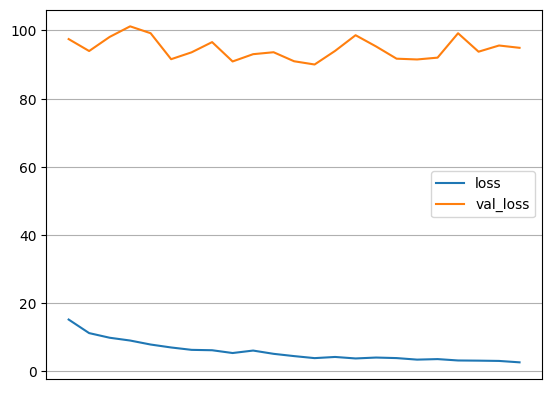

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.gca().axes.xaxis.set_visible(False)
plt.plot()

[]

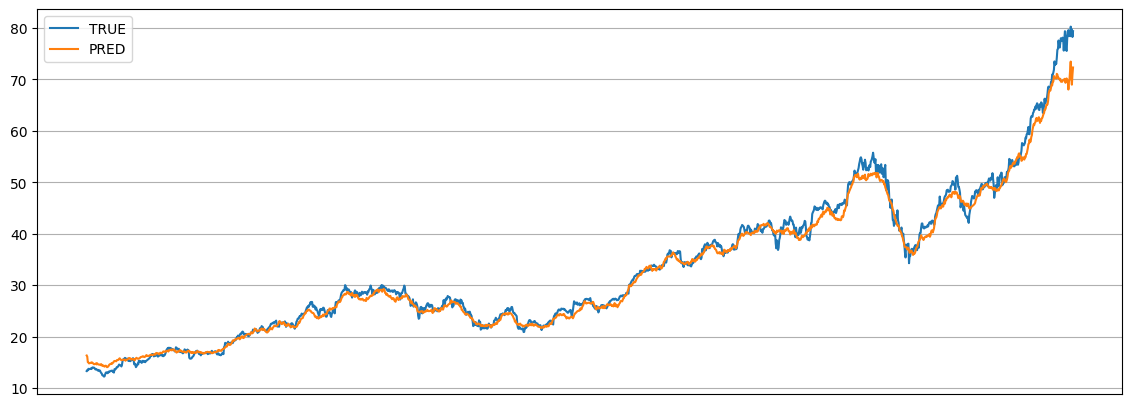

In [14]:
if forecast_length == 1:
    pred = model.predict(X_train, verbose=0)       #forecast_length = 1 -> pred.shape = (n, )
else:
    pred = model.predict(X_train, verbose=0).squeeze()

full_pred = np.full((len(pred), len(pred[0])+len(pred)-1), np.nan)
for index, value in enumerate(pred):
    full_pred[index][index:index+forecast_length] = value
full_pred_mean = np.nanmean(full_pred, axis=0)

y_true = df_symbol_history[:int(len(df_symbol_history)*0.7)][target_column][backcast_length:]

plt.figure(figsize=(14,5))
plt.plot(y_true, label='TRUE')
plt.plot(full_pred_mean, label='PRED')
plt.legend()
plt.grid()
plt.gca().axes.xaxis.set_visible(False)
plt.plot()

[]

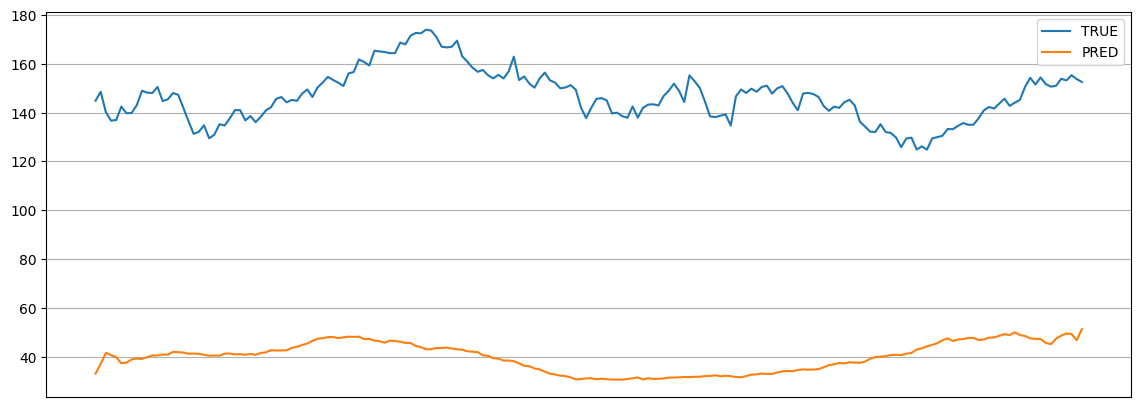

In [15]:
if forecast_length == 1:
    pred = model.predict(X_test, verbose=0)       #forecast_length = 1 -> pred.shape = (n, )
else:
    pred = model.predict(X_test, verbose=0).squeeze()

full_pred = np.full((len(pred), len(pred[0])+len(pred)-1), np.nan)
for index, value in enumerate(pred):
    full_pred[index][index:index+forecast_length] = value
full_pred_mean = np.nanmean(full_pred, axis=0)

y_true = df_symbol_history[int(len(df_symbol_history)*0.9):][target_column][backcast_length:]

plt.figure(figsize=(14,5))
plt.plot(y_true, label='TRUE')
plt.plot(full_pred_mean, label='PRED')
plt.legend()
plt.grid()
plt.gca().axes.xaxis.set_visible(False)
plt.plot()

In [16]:
# 가공전 데이터가 입력 데이터일때
# 모델 output이 rate로 출력할 때
# 이전 close값에 rate만큼 곱해서 실제 모델이 추측하는 실제 close값으로 변환하여 그래프토 나타냄
# 해당 그래프틑 X_train에 대한 그래프임

# if forecast_length == 1:
#     pred = model.predict(X_train, verbose=0)       #forecast_length = 1 -> pred.shape = (n, )
# else:
#     pred = model.predict(X_train, verbose=0).squeeze()

# full_pred = np.full((len(pred), len(pred[0])+len(pred)-1), np.nan)
# for index, value in enumerate(pred):
#     full_pred[index][index:index+forecast_length] = value
# full_pred_mean = np.nanmean(full_pred, axis=0)

# pred_close = []
# prev_close = data_rate['Close'][backcast_length-1]
# for i in range(len(full_pred_mean)):
#     pred_close.append((full_pred_mean[i]/100 + 1) * prev_close)
#     prev_close *= (full_pred_mean[i]/100 + 1)

# pred_close = np.array(pred_close, dtype=np.float32)
# y_true_close = np.array(data_rate['Close'][backcast_length:int(len(data_rate)*0.7)])

# plt.figure(figsize=(14,5))
# plt.plot(y_true_close, label='TRUE')
# plt.plot(pred_close, label='PRED')
# plt.title('X_train_prediction')
# plt.legend()
# plt.grid()
# plt.gca().axes.xaxis.set_visible(False)
# plt.plot()

In [17]:
# 가공전 데이터가 입력 데이터일때
# 모델 output이 rate로 출력할 때
# 이전 close값에 rate만큼 곱해서 실제 모델이 추측하는 실제 close값으로 변환하여 그래프토 나타냄
# 해당 그래프틑 X_test에 대한 그래프임

# pred_close = []
# prev_close = data_rate['Close'][int(len(data_rate)*0.9)+backcast_length-1]
# for i in range(len(full_pred_mean)):
#     pred_close.append((full_pred_mean[i]/100 + 1) * prev_close)
#     prev_close *= (full_pred_mean[i]/100 + 1)

# pred_close = np.array(pred_close, dtype=np.float32)
# y_true_close = np.array(data_rate['Close'][int(len(data_rate)*0.9)+backcast_length:])

# plt.figure(figsize=(14,5))
# plt.plot(y_true_close, label='TRUE')
# plt.plot(pred_close, label='PRED')
# plt.title('X_test_Prediction')
# plt.legend()
# plt.grid()
# plt.gca().axes.xaxis.set_visible(False)
# plt.plot()

In [18]:
# 가공후 모든 데이터가 비율로 가공한 입력 데이터일때
# 모델 output이 rate로 출력할 때
# 원데 데이터의 close를 가져와 예측한 rate와 곱하여 close예측값으로 변환하는 그래프를 그림
# 해당 그래프틑 X_train에 대한 그래프임

# if forecast_length == 1:
#     pred = model.predict(X_train, verbose=0)       #forecast_length = 1 -> pred.shape = (n, )
# else:
#     pred = model.predict(X_train, verbose=0).squeeze()

# full_pred = np.full((len(pred), len(pred[0])+len(pred)-1), np.nan)
# for index, value in enumerate(pred):
#     full_pred[index][index:index+forecast_length] = value
# full_pred_mean = np.nanmean(full_pred, axis=0)

# pred_close = []
# prev_close = df_symbol_history[1:]['Close'][backcast_length-1]
# for i in range(len(full_pred_mean)):
#     pred_close.append((full_pred_mean[i]/100 + 1) * prev_close)
#     prev_close *= (full_pred_mean[i]/100 + 1)

# pred_close = np.array(pred_close, dtype=np.float32)
# y_true_close = np.array(df_symbol_history[1:]['Close'][backcast_length:int(len(df_symbol_history)*0.7)])

# plt.figure(figsize=(14,5))
# plt.plot(y_true_close, label='TRUE')
# plt.plot(pred_close, label='PRED')
# plt.title('X_train_Prediction')
# plt.legend()
# plt.grid()
# plt.gca().axes.xaxis.set_visible(False)
# plt.plot()

In [19]:
# 가공후 모든 데이터가 비율로 가공한 입력 데이터일때
# 모델 output이 rate로 출력할 때
# 원데 데이터의 close를 가져와 예측한 rate와 곱하여 close예측값으로 변환하는 그래프를 그림
# 해당 그래프틑 X_test에 대한 그래프임

# if forecast_length == 1:
#     pred = model.predict(X_test, verbose=0)       #forecast_length = 1 -> pred.shape = (n, )
# else:
#     pred = model.predict(X_test, verbose=0).squeeze()

# full_pred = np.full((len(pred), len(pred[0])+len(pred)-1), np.nan)
# for index, value in enumerate(pred):
#     full_pred[index][index:index+forecast_length] = value
# full_pred_mean = np.nanmean(full_pred, axis=0)

# pred_close = []
# prev_close = df_symbol_history[1:]['Close'][int(len(df_symbol_history)*0.9)+backcast_length-1]
# for i in range(len(full_pred_mean)):
#     pred_close.append((full_pred_mean[i]/100 + 1) * prev_close)
#     prev_close *= (full_pred_mean[i]/100 + 1)

# pred_close = np.array(pred_close, dtype=np.float32)
# y_true_close = np.array(df_symbol_history[1:]['Close'][int(len(df_symbol_history)*0.9)+backcast_length:])

# plt.figure(figsize=(14,5))
# plt.plot(y_true_close, label='TRUE')
# plt.plot(pred_close, label='PRED')
# plt.title('X_test_Prediction')
# plt.legend()
# plt.grid()
# plt.gca().axes.xaxis.set_visible(False)
# plt.plot()